In [1]:
import librosa
import numpy 
from IPython.display import Audio
import matplotlib.pyplot as plt
from scipy import stats

In [7]:
data, sr = librosa.load('./audios/pi.wav')
Audio(data=data, rate=sr)

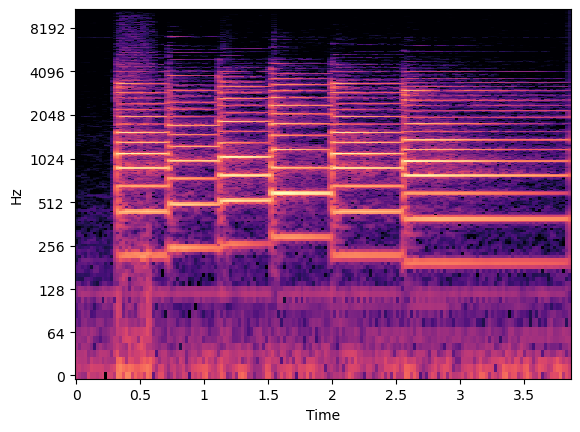

In [8]:
D = numpy.abs(librosa.stft(data))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=numpy.max), x_axis="time", y_axis='log')

In [9]:
onset_env = librosa.onset.onset_strength(y=data, sr=sr)
times = librosa.times_like(onset_env, sr=sr)
onset_frames = librosa.onset.onset_detect(y=data, sr=sr, units='samples', hop_length=100, backtrack=False,
                                          pre_max=20, post_max=20, pre_avg=100, post_avg=100, delta=0.1, wait=0)
onset_times = librosa.samples_to_time(onset_frames)
onset_sample_times = numpy.concatenate(
    [librosa.time_to_samples(onset_times), [len(data)]])

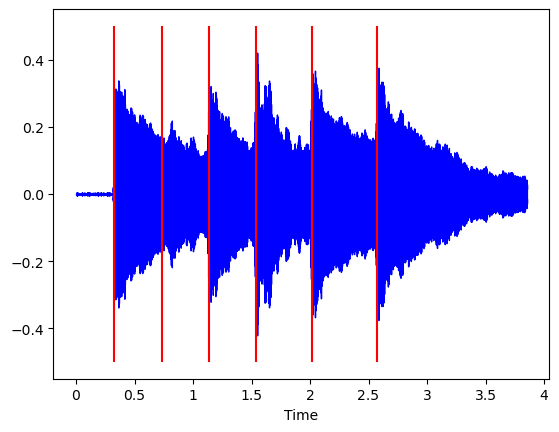

In [10]:
librosa.display.waveshow(y=data, sr=sr, color="blue")
# librosa.display.specshow(librosa.amplitude_to_db(D, ref=numpy.max), x_axis="time", y_axis='log')
plt.vlines(onset_times, -0.5, 0.5, color='r')

In [11]:
freqs = []

fmin = librosa.note_to_hz('C1') 
fmax = librosa.note_to_hz('C8') 

for i in range(len(onset_sample_times) - 1):
    start_sample = onset_sample_times[i]
    end_sample = onset_sample_times[i + 1]
    
    segment = data[start_sample:end_sample]
    
    f0 = librosa.yin(segment, fmin=fmin, fmax=fmax, sr=sr)
    
    pitch_predominante = stats.mode(f0)[0]
    
    freqs.append((f'{onset_times[i]:.2f} segundos', librosa.hz_to_note(pitch_predominante), pitch_predominante))
 
freqs

for f in freqs:
    print(f"{f[1]} em {f[0]} - [{f[2]:.2f}hz]")

A3 em 0.33 segundos - [221.17hz]
B3 em 0.73 segundos - [248.83hz]
C4 em 1.13 segundos - [263.72hz]
D4 em 1.54 segundos - [296.52hz]
A3 em 2.01 segundos - [221.06hz]
G3 em 2.58 segundos - [197.15hz]
